In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
# taks1
medical_df=pd.read_csv('DS1_C9_S3_Practice_MedicalPremium_Data.csv')
medical_df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [3]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [4]:
medical_df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

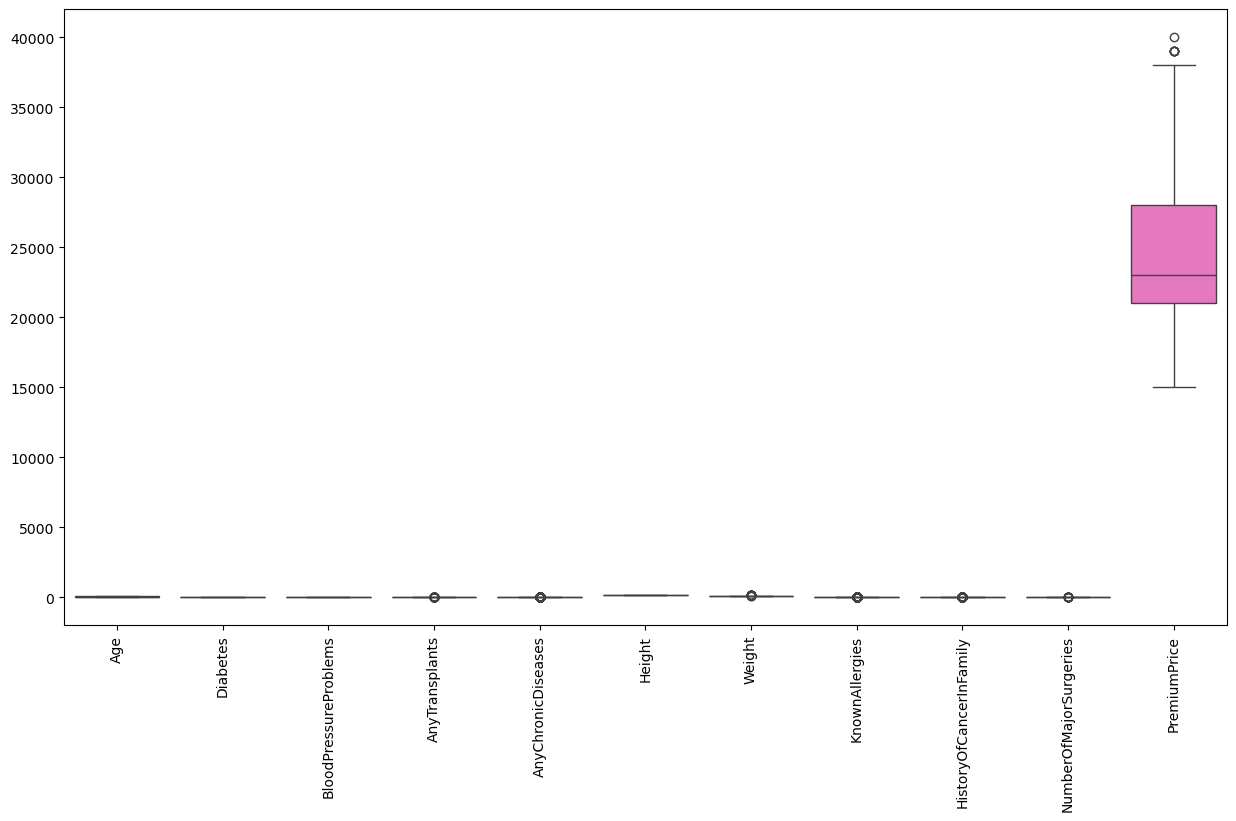

In [5]:
# task2
sns.boxplot(data=medical_df)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15,8)

In [6]:
data=[]
for col in medical_df:
    LO=[]
    UO=[]
    ser=pd.Series(medical_df[col])
    Max=max(ser)
    Min=min(ser)
    Range=Max-Min
    Q1=ser.quantile(0.25)
    Q3=ser.quantile(0.75)
    IQR=Q3-Q1
    UF=Q3+1.5*IQR
    LF=Q1-1.5*IQR
    for z in ser:
        if z>UF:
            UO.append(z)
        if z<LF:
            LO.append(z)
    data.append([col,Max,Min,Range,Q1,Q3,IQR,UF,LF,[LO,UO]])
treated_medical_df=pd.DataFrame(data,columns=['column','Maximum','Minimum','Range','Q1','Q3','IQR','UF','LF','outliers'])
treated_medical_df

,column,Maximum,Minimum,Range,Q1,Q3,IQR,UF,LF,outliers
0,Age,66,18,48,30.0,53.0,23.0,87.5,-4.5,"[[], []]"
1,Diabetes,1,0,1,0.0,1.0,1.0,2.5,-1.5,"[[], []]"
2,BloodPressureProblems,1,0,1,0.0,1.0,1.0,2.5,-1.5,"[[], []]"
3,AnyTransplants,1,0,1,0.0,0.0,0.0,0.0,0.0,"[[], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1..."
4,AnyChronicDiseases,1,0,1,0.0,0.0,0.0,0.0,0.0,"[[], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1..."
5,Height,188,145,43,161.0,176.0,15.0,198.5,138.5,"[[], []]"
6,Weight,132,51,81,67.0,87.0,20.0,117.0,37.0,"[[], [118, 121, 119, 129, 127, 132, 120, 128, ..."
7,KnownAllergies,1,0,1,0.0,0.0,0.0,0.0,0.0,"[[], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1..."
8,HistoryOfCancerInFamily,1,0,1,0.0,0.0,0.0,0.0,0.0,"[[], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1..."
9,NumberOfMajorSurgeries,3,0,3,0.0,1.0,1.0,2.5,-1.5,"[[], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3..."


In [7]:
# treating outliers
def iqr_winsorisation(df,thresh=1.5):
    df_out=df.copy()
    col_to_treat=df_out.columns
    for col in col_to_treat:
        Q1=df_out[col].quantile(0.25)
        Q3=df_out[col].quantile(0.75)
        IQR=Q3-Q1
        uf=Q3+thresh*IQR
        lf=Q1-thresh*IQR
        df_out.loc[df_out[col]>uf,col]=uf
        df_out.loc[df_out[col]<lf,col]=lf
    return df_out

In [8]:
treated_df=iqr_winsorisation(medical_df)
treated_df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45.0,0.0,0.0,0,0,155.0,57,0,0,0.0,25000
1,60.0,1.0,0.0,0,0,180.0,73,0,0,0.0,29000
2,36.0,1.0,1.0,0,0,158.0,59,0,0,1.0,23000
3,52.0,1.0,1.0,0,0,183.0,93,0,0,2.0,28000
4,38.0,0.0,0.0,0,0,166.0,88,0,0,1.0,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18.0,0.0,0.0,0,0,169.0,67,0,0,0.0,15000
982,64.0,1.0,1.0,0,0,153.0,70,0,0,2.5,28000
983,56.0,0.0,1.0,0,0,155.0,71,0,0,1.0,29000
984,47.0,1.0,1.0,0,0,158.0,73,0,0,1.0,38500


In [9]:
data1=[]
for col in treated_df:
    LO=[]
    UO=[]
    ser1=pd.Series(treated_df[col])
    Max=max(ser)
    Min=min(ser)
    Range=Max-Min
    Q1=ser1.quantile(0.25)
    Q3=ser1.quantile(0.75)
    IQR=Q3-Q1
    UF=Q3+1.5*IQR
    LF=Q1-1.5*IQR
    for z in ser1:
        if z>UF:
            UO.append(z)
        elif z<LF:
            LO.append(z)
    data1.append([col,Max,Min,Range,Q1,Q3,IQR,UF,LF,[LO,UO]])
check=pd.DataFrame(data1,columns=['column','Maximum','Minimum','Range','Q1','Q3','IQR','UF','LF','outliers'])
check

,column,Maximum,Minimum,Range,Q1,Q3,IQR,UF,LF,outliers
0,Age,40000,15000,25000,30.0,53.0,23.0,87.5,-4.5,"[[], []]"
1,Diabetes,40000,15000,25000,0.0,1.0,1.0,2.5,-1.5,"[[], []]"
2,BloodPressureProblems,40000,15000,25000,0.0,1.0,1.0,2.5,-1.5,"[[], []]"
3,AnyTransplants,40000,15000,25000,0.0,0.0,0.0,0.0,0.0,"[[], []]"
4,AnyChronicDiseases,40000,15000,25000,0.0,0.0,0.0,0.0,0.0,"[[], []]"
5,Height,40000,15000,25000,161.0,176.0,15.0,198.5,138.5,"[[], []]"
6,Weight,40000,15000,25000,67.0,87.0,20.0,117.0,37.0,"[[], []]"
7,KnownAllergies,40000,15000,25000,0.0,0.0,0.0,0.0,0.0,"[[], []]"
8,HistoryOfCancerInFamily,40000,15000,25000,0.0,0.0,0.0,0.0,0.0,"[[], []]"
9,NumberOfMajorSurgeries,40000,15000,25000,0.0,1.0,1.0,2.5,-1.5,"[[], []]"


In [10]:
# scaling
scaler=StandardScaler()
scaled_df=scaler.fit_transform(treated_df)
scaled_df=pd.DataFrame(scaled_df,columns=treated_df.columns)
scaled_df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,0.233197,-0.850750,-0.938978,0.0,0.0,-1.306105,-1.425307,0.0,0.0,-0.908200,0.107023
1,1.307981,1.175433,-0.938978,0.0,0.0,1.170852,-0.276146,0.0,0.0,-0.908200,0.748509
2,-0.411674,1.175433,1.064988,0.0,0.0,-1.008870,-1.281662,0.0,0.0,0.469470,-0.213720
3,0.734763,1.175433,1.064988,0.0,0.0,1.468086,1.160307,0.0,0.0,1.847140,0.588137
4,-0.268369,-0.850750,-0.938978,0.0,0.0,-0.216244,0.801194,0.0,0.0,0.469470,-0.213720
...,...,...,...,...,...,...,...,...,...,...,...
981,-1.701415,-0.850750,-0.938978,0.0,0.0,0.080991,-0.707081,0.0,0.0,-0.908200,-1.496692
982,1.594590,1.175433,1.064988,0.0,0.0,-1.504261,-0.491613,0.0,0.0,2.535975,0.588137
983,1.021372,-0.850750,1.064988,0.0,0.0,-1.306105,-0.419791,0.0,0.0,0.469470,0.748509
984,0.376502,1.175433,1.064988,0.0,0.0,-1.008870,-0.276146,0.0,0.0,0.469470,2.272038


In [11]:
# task3
abs(scaled_df.corr())>=0.7

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
Age,True,False,False,False,False,False,False,False,False,False,False
Diabetes,False,True,False,False,False,False,False,False,False,False,False
BloodPressureProblems,False,False,True,False,False,False,False,False,False,False,False
AnyTransplants,False,False,False,False,False,False,False,False,False,False,False
AnyChronicDiseases,False,False,False,False,False,False,False,False,False,False,False
Height,False,False,False,False,False,True,False,False,False,False,False
Weight,False,False,False,False,False,False,True,False,False,False,False
KnownAllergies,False,False,False,False,False,False,False,False,False,False,False
HistoryOfCancerInFamily,False,False,False,False,False,False,False,False,False,False,False
NumberOfMajorSurgeries,False,False,False,False,False,False,False,False,False,True,False


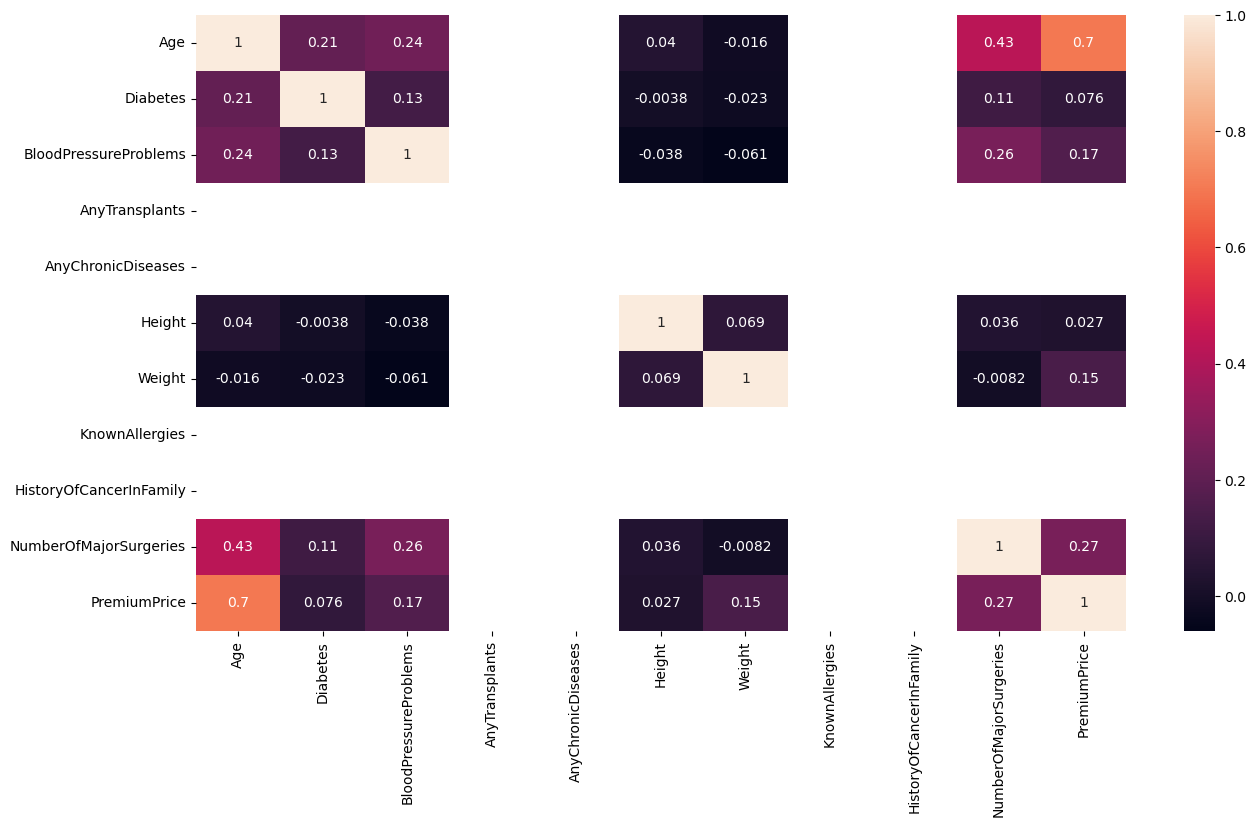

In [12]:
fig,ax=plt.subplots(figsize=(15,8))
ax=sns.heatmap(scaled_df.corr(),annot=True)


In [13]:
scaled_df.corr()[['PremiumPrice']].sort_values('PremiumPrice',ascending=False)

,PremiumPrice
PremiumPrice,1.000000
Age,0.698625
NumberOfMajorSurgeries,0.266039
BloodPressureProblems,0.166821
Weight,0.145397
Diabetes,0.076220
Height,0.027389
AnyTransplants,NaN
AnyChronicDiseases,NaN
KnownAllergies,NaN


In [14]:
selected_scaled_df=scaled_df.drop(['AnyTransplants','AnyChronicDiseases','KnownAllergies','HistoryOfCancerInFamily','Height','Diabetes','Weight'],axis=1)
selected_scaled_df

,Age,BloodPressureProblems,NumberOfMajorSurgeries,PremiumPrice
0,0.233197,-0.938978,-0.908200,0.107023
1,1.307981,-0.938978,-0.908200,0.748509
2,-0.411674,1.064988,0.469470,-0.213720
3,0.734763,1.064988,1.847140,0.588137
4,-0.268369,-0.938978,0.469470,-0.213720
...,...,...,...,...
981,-1.701415,-0.938978,-0.908200,-1.496692
982,1.594590,1.064988,2.535975,0.588137
983,1.021372,1.064988,0.469470,0.748509
984,0.376502,1.064988,0.469470,2.272038


# 1st model

In [16]:
X=np.array(selected_scaled_df['Age']).reshape(-1,1)
y=np.array(selected_scaled_df['PremiumPrice'])

In [17]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2,random_state=200)


In [18]:
s_model=LinearRegression().fit(X_train1,y_train1)
print('intercept:',s_model.intercept_)
print('slope:',s_model.coef_)

intercept: 0.001663880978243916
slope: [0.70156229]


In [19]:
y_pred1=s_model.predict(X_test1)
y_pred1[0]

1.1706369016190512

In [20]:
# Calculating MSE, MAE, RMSE, R-Square
MSE1= mean_squared_error(y_test1,y_pred1)
print('MSE:',MSE1)
MAE1= mean_absolute_error(y_test1,y_pred1)
print('MAE:',MAE1)
RMSE1= mean_squared_error(y_test1,y_pred1,squared=False)
print('RMSE:',RMSE1)
R2_1 = r2_score(y_test1,y_pred1)
print('R2_1-score:',R2_1)

MSE: 0.4761829467526667
MAE: 0.4951208131700598
RMSE: 0.6900601037247891
R2_1-score: 0.4891109603335414


# 2nd model

In [22]:
X2=np.array(selected_scaled_df[['Age','NumberOfMajorSurgeries']]).reshape(-1,2)
y=np.array(selected_scaled_df['PremiumPrice'])

In [23]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y,test_size=0.2,random_state=100)


In [24]:
mult_model=LinearRegression().fit(X_train2,y_train2)
print('intercept:',mult_model.intercept_)
print('slope:',mult_model.coef_)

intercept: 0.004815783409542279
slope: [ 0.71214509 -0.03993758]


In [25]:
y_pred2=mult_model.predict(X_test2)
y_pred2[0]

-0.047976947829985364

In [26]:
# Calculating MSE, MAE, RMSE, R-Square
MSE2= mean_squared_error(y_test2,y_pred2)
print('MSE:',MSE2)
MAE2= mean_absolute_error(y_test2,y_pred2)
print('MAE:',MAE2)
RMSE2= mean_squared_error(y_test2,y_pred2,squared=False)
print('RMSE:',RMSE2)
R2_2 = r2_score(y_test2,y_pred2)
print('R2_2-score:',R2_2)

MSE: 0.5071408246459809
MAE: 0.5310972003724651
RMSE: 0.7121382061411822
R2_2-score: 0.5025937004576997


# 3rd model

In [28]:
X3=np.array(selected_scaled_df[['Age','NumberOfMajorSurgeries','BloodPressureProblems']]).reshape(-1,3)
y=np.array(selected_scaled_df['PremiumPrice'])

In [29]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,y,test_size=0.2,random_state=100)


In [30]:
mult_model_2=LinearRegression().fit(X_train3,y_train3)
print('intercept:',mult_model_2.intercept_)
print('slope:',mult_model_2.coef_)

intercept: 0.004607795200685227
slope: [ 0.70965236 -0.04235679  0.01321279]


In [31]:
y_pred3=mult_model_2.predict(X_test3)
y_pred3[0]

-0.031604593478727835

In [32]:
# Calculating MSE, MAE, RMSE, R-Square
MSE3= mean_squared_error(y_test3,y_pred3)
print('MSE:',MSE3)
MAE3= mean_absolute_error(y_test3,y_pred3)
print('MAE:',MAE3)
RMSE3= mean_squared_error(y_test3,y_pred3,squared=False)
print('RMSE:',RMSE3)
R2_3 = r2_score(y_test3,y_pred3)
print('R2_3-score:',R2_3)

MSE: 0.5083226899204569
MAE: 0.5312997911271565
RMSE: 0.7129675237487728
R2_3-score: 0.5014345209868988


In [33]:
# task4

In [34]:
# task5
def calculate_residuals(model,feature,label):
    predictions=s_model.predict(feature)
    df_result=pd.DataFrame({'actual':label,'predicted':predictions})
    df_result['residual']=abs(df_result['actual'])-abs(df_result['predicted'])
    return df_result

def linear_assumption(model,feature,label):
    df_result=calculate_residuals(model,feature,label)

    sns.lmplot(x='actual',y='predicted',data=df_result,fit_reg=False)
    line_coord=np.arange(df_result.min().min(),df_result.max().max())
    plt.plot(line_coord,line_coord,color='red',ls='dotted')
    plt.title('actual vs predicted')
    plt.show()


    
    

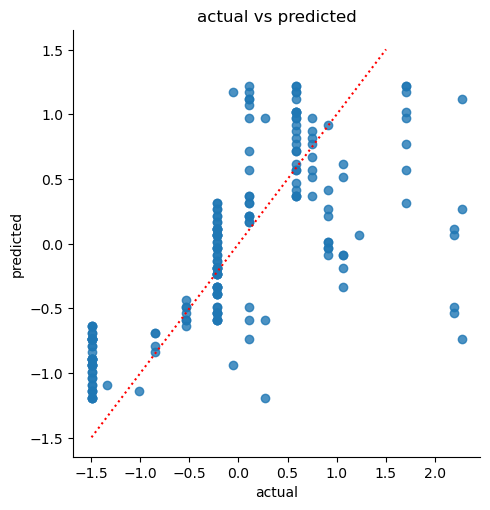

In [35]:
linear_assumption(s_model,X_test1,y_test1)

In [36]:
def homoscedasticity_assumption(model, feature, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption: Homoscedasticity of Error Terms', '\n')
    print('Residuals should have relative constant variance')
    #calculating residuals foethr plot
    df_result=calculate_residuals(model,feature,label)
    print(df_result)
    #plotting the residuals
    plt.subplots(figsize=(12,10))
    ax=plt.subplot(111) #to remove spines
    plt.scatter(x=df_result.index,y=df_result.residual,alpha=0.5,color="green") 
    plt.plot(np.repeat(0,df_result.index.max()),color="brown",linestyle="--")
    plt.title("Residual Plot")
    plt.xlabel("Index")
    plt.ylabel("Residuals")
    plt.show()

Assumption: Homoscedasticity of Error Terms 

Residuals should have relative constant variance
       actual  predicted  residual
0    0.588137   1.170637 -0.582500
1    1.069252  -0.186614  0.882638
2   -0.213720   0.265803 -0.052083
3   -0.213720  -0.337419 -0.123699
4    0.107023   0.567414 -0.460392
..        ...        ...       ...
193 -0.213720  -0.588762 -0.375042
194 -1.496692  -1.091447  0.405245
195  0.748509   0.818757 -0.070248
196 -1.496692  -0.739568  0.757125
197  1.710738   0.768489  0.942249

[198 rows x 3 columns]


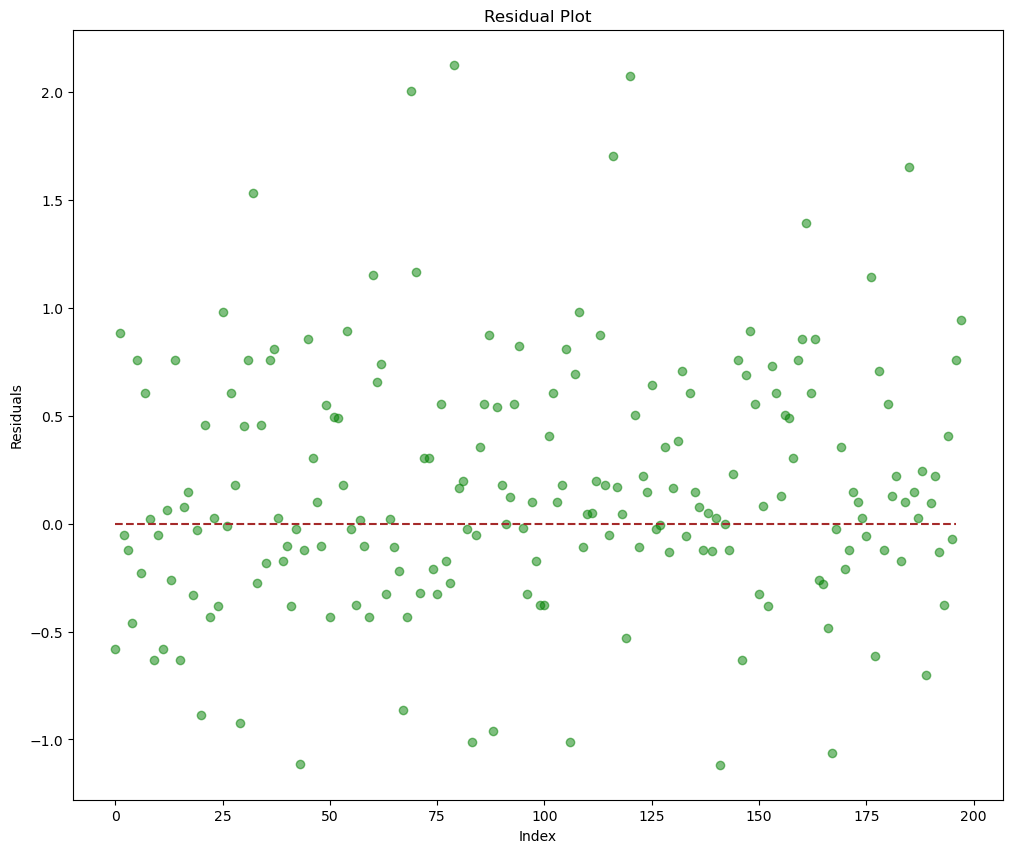

In [37]:
homoscedasticity_assumption(s_model,X_test1,y_test1)

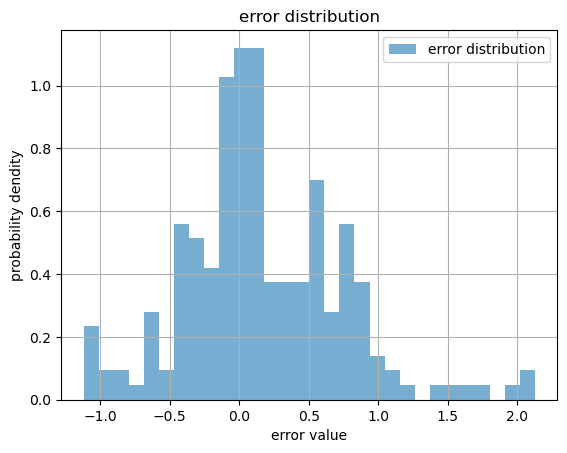

In [38]:
df_result=calculate_residuals(s_model,X_test1,y_test1)
plt.hist(df_result.residual,bins=30,label='error distribution',alpha=0.6,density=True)
plt.xlabel('error value')
plt.ylabel('probability dendity')
plt.title('error distribution')
plt.grid(True)
plt.legend()
plt.show()

# final-equation
y=a+bx+c
y=0.004+0.709x

Text(0.5, 0, 'PremiumPrice')

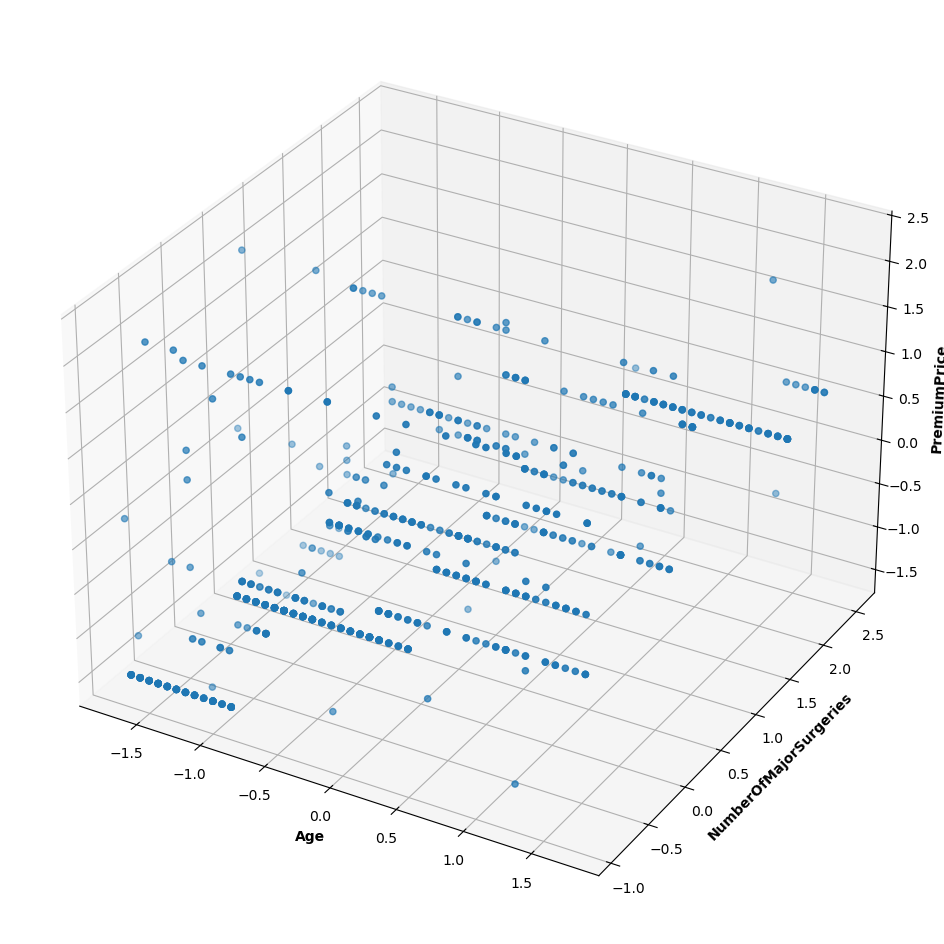

In [40]:

X_2=selected_scaled_df[['Age','NumberOfMajorSurgeries']].values.reshape(-1,2)
Y=selected_scaled_df['PremiumPrice']
x=X_2[:,0] #this extracts the first column
y=X_2[:,1]
z=Y

fig=plt.figure(figsize=(16,12))
ax=plt.axes(projection='3d')
# ax.grid(b=True)

ax.scatter3D(x,y,z)
ax.set_xlabel('Age',fontweight='bold')
ax.set_ylabel('NumberOfMajorSurgeries',fontweight='bold')
ax.set_zlabel('PremiumPrice',fontweight='bold')

In [1]:
# MSE (Mean Squared Error): Model 1 has the lowest MSE (0.4762), meaning it has lower squared errors.
# MAE (Mean Absolute Error): Model 1 also has the lowest MAE (0.4951), indicating lower absolute deviations from actual values.
# RMSE (Root Mean Squared Error): Model 1 has the lowest RMSE (0.6901), meaning it makes smaller errors on average.
# # R²-Score (Coefficient of Determination): Model 2 has the highest R² (0.5026), meaning it explains the most variance in the target variable.

In [ ]:
# If error minimization is the priority, Model 1 is the best choice since it has the lowest MSE, MAE, and RMSE.
# If explanatory power is more important, Model 2 is slightly better because it has the highest R² score (0.5026), meaning it explains the most variance.
# However, the differences between Model 2 and Model 3 are very small, suggesting that they perform almost identically.
# Overall, Model 1 is the best in terms of lower errors, but Model 2 has a marginally better R². If precision in prediction is the goal, Model 1 should be preferred.